## Employee Attrition Analysis & Prediction

### Business Problem
Employee attrition leads to high hiring cost, productivity loss, and knowledge drain.
The objective is to:
1. Identify key factors influencing employee attrition
2. Predict attrition using machine learning
3. Provide actionable insights to HR




In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
## load the dataset 
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## Basic Data Understanding

In [2]:
## check dataset shape 
df.shape

(1470, 35)

In [3]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Checking Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking for Missing Values
df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#Basic Statistical Summary (All Numerical Columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
## duplicate
df.duplicated().sum()


0

In [8]:

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Data Overview
- No missing values in this dataset.
- Contains 35 columns with demographic, job-related, and performance features

In [9]:
df = df.drop(['EmployeeCount','EmployeeNumber' ,'Over18', 'StandardHours'],axis=1)

These columns provide no predictive value:
- EmployeeNumber: unique identifier
- Over18: constant value
- StandardHours: same for all employees


In [10]:
# Take a copy of our data and make analysis on it as we like!
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [11]:
## Target Variable Creation
df_copy['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})




Attrition_flag is created where 1 indicates employees who left
and 0 indicates employees who stayed.

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


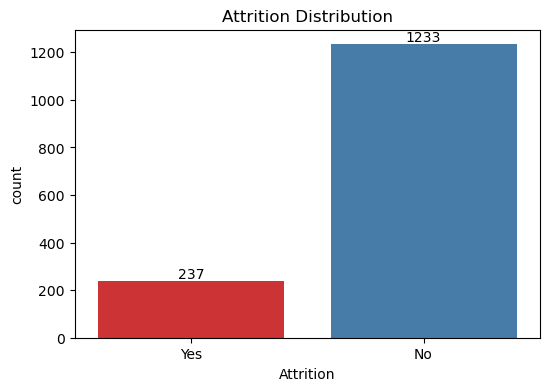

In [12]:
# overall Attrition rate
attrition_percentages=df_copy['Attrition'].value_counts(normalize=True) *100
print(attrition_percentages)
plt.figure(figsize=(6,4))
ax=sns.countplot(data=df_copy, x='Attrition', hue='Attrition', palette='Set1', legend=False)
plt.title('Attrition Distribution')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## observation 
Around 16% of employees have left the company. This will be our main target variable for analysis.

## Demographic Analysis
This section analyzes how employee demographics relate to attrition.


Age_bucket
18–25    35.772358
26-35    19.141914
36-45     9.188034
46-55    11.504425
56+      17.021277
Name: Attrition_flag, dtype: float64


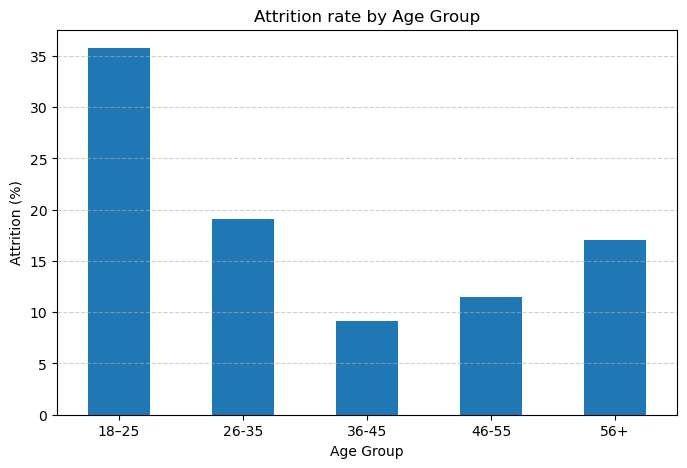

In [13]:
## attriton by age 
df_copy['Age_bucket']=pd.cut(
    df_copy['Age'],
    bins=[18,25,35,45,55,df_copy['Age'].max()+1],
    labels=['18–25', '26-35', '36-45', '46-55', '56+'],include_lowest=True
    
)
age_attriton_rate=df_copy.groupby('Age_bucket')['Attrition_flag'].mean()*100
print(age_attriton_rate)
age_attriton_rate.plot(kind='bar', figsize=(8,5),title='Attrition rate by Age Group')
plt.ylabel('Attrition (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Age-wise Attrition Insights

Attrition is highest among employees aged 18–25 (≈36%), indicating that early-career
employees are more likely to leave the organization. Attrition decreases steadily with
age, suggesting higher job stability among mid-career and senior employees. This trend
highlights the need for stronger engagement and retention strategies for younger employees.


In [14]:
df_copy.loc[df_copy['Age_bucket'] == 'Young', 'Age'].min()

nan

In [15]:
df_copy.groupby('Age_bucket')['Age'].max()


Age_bucket
18–25    25
26-35    35
36-45    45
46-55    55
56+      60
Name: Age, dtype: int64

Gender
Female    14.795918
Male      17.006803
Name: Attrition_flag, dtype: float64


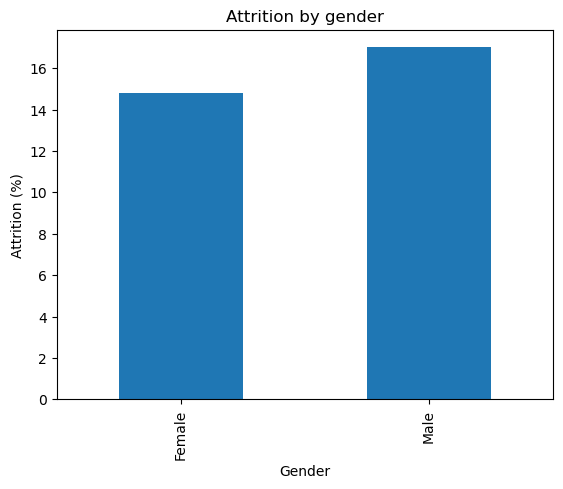

In [16]:
## atttrition by gender 
gender_attrition=df_copy.groupby('Gender')['Attrition_flag'].mean()*100
print(gender_attrition)
gender_attrition.plot(kind='bar', title='Attrition by gender')
plt.ylabel('Attrition (%)')
plt.show()

### Gender-wise Attrition

Male employees show a slightly higher attrition rate than female employees, indicating that males are marginally more likely to leave the organization.



MaritalStatus
Divorced    10.091743
Married     12.481426
Single      25.531915
Name: Attrition_flag, dtype: float64


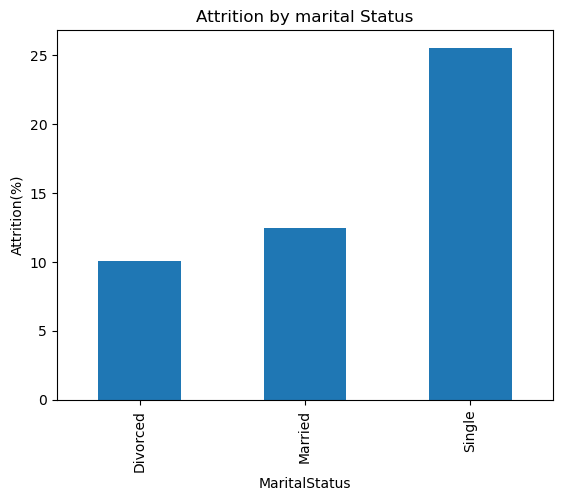

In [17]:
## Attrition by Marital Status
marital_attrition = df_copy.groupby('MaritalStatus')['Attrition_flag'].mean() * 100
print(marital_attrition)
marital_attrition.plot(kind='bar',title='Attrition by marital Status')
plt.ylabel('Attrition(%)')
plt.show()

### Marital Status–wise Attrition

Single employees show noticeably higher attrition compared to married and divorced employees, indicating that employees without family commitments are more likely to leave the organization.


Education_Bucket
Bachelor         17.307692
Below College    18.235294
College          15.602837
Doctor           10.416667
Master           14.572864
Name: Attrition_flag, dtype: float64


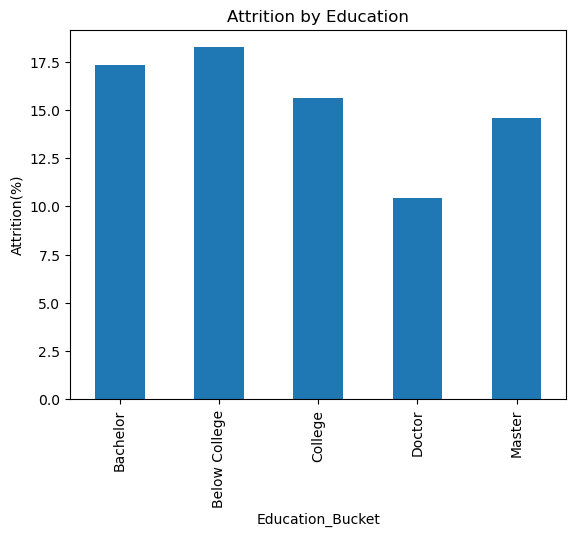

In [18]:
## Education-wise Attrition Rate
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df_copy['Education_Bucket'] = df_copy['Education'].map(education_map)

edu_attrition = df_copy.groupby('Education_Bucket')['Attrition_flag'].mean() * 100
print(edu_attrition)
edu_attrition.plot(kind='bar',title='Attrition by Education')
plt.ylabel('Attrition(%)')
plt.show()

### Education-wise Attrition

Employees with lower education levels show relatively higher attrition, while employees with advanced degrees demonstrate better retention. This suggests that higher educational attainment is associated with greater job stability.


EducationField
Human Resources     25.925926
Life Sciences       14.686469
Marketing           22.012579
Medical             13.577586
Other               13.414634
Technical Degree    24.242424
Name: Attrition_flag, dtype: float64


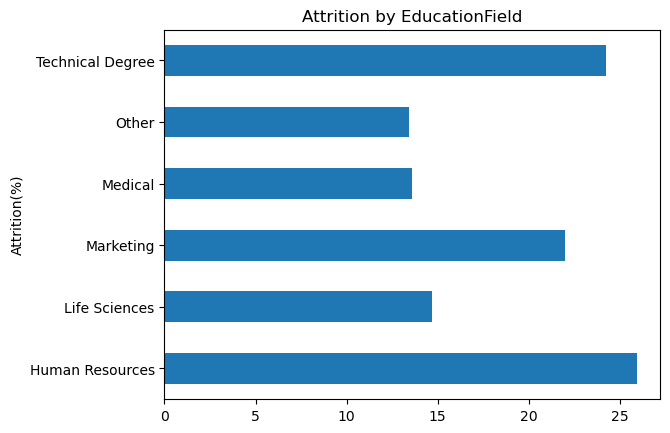

In [19]:
## EducationField -wise Attrition Rate
EducationField_attrition =df_copy.groupby('EducationField')['Attrition_flag'].mean()*100
print(EducationField_attrition)
EducationField_attrition.plot(kind='barh',title='Attrition by EducationField')
plt.ylabel('Attrition(%)')
plt.show()

### Education Field–wise Attrition

Attrition varies across education fields, with higher attrition observed in Human Resources, Marketing, and Technical Degree backgrounds. This indicates that attrition risk is influenced by field-specific job demand and role alignment.


## Compensation Analysis
- How pay impacts attrition


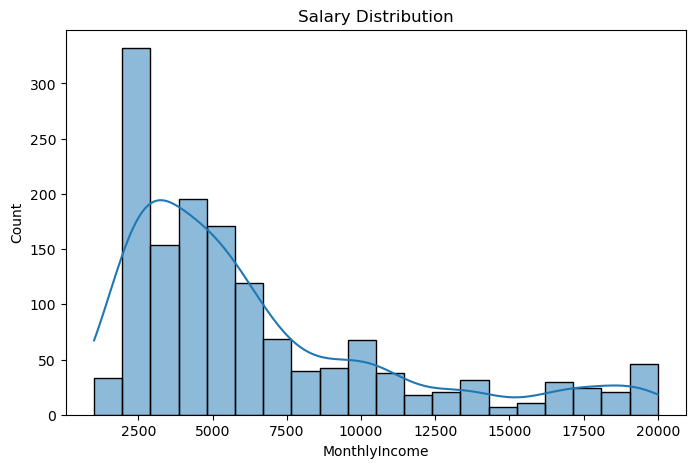

In [20]:
## Salary idtribution plot 
plt.figure(figsize=(8,5))
sns.histplot(df_copy['MonthlyIncome'], kde=True)
plt.title("Salary Distribution")
plt.show()

Salary_Bucket
Very Low     25.230203
Low          10.772358
Medium       14.285714
High         13.513514
Very High     3.759398
Name: Attrition_flag, dtype: float64


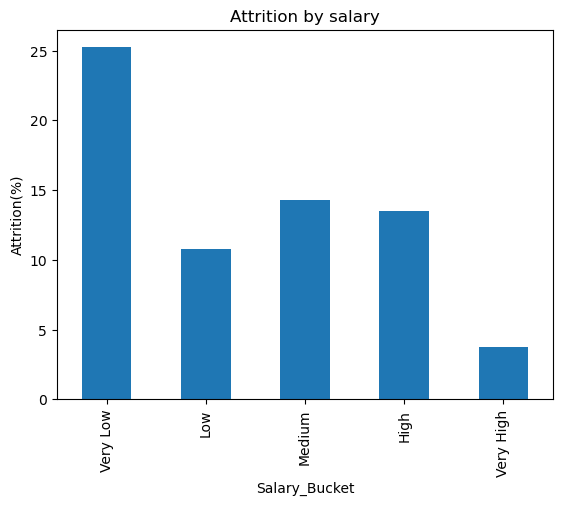

In [21]:

df_copy['Salary_Bucket'] = pd.cut(
    df_copy['MonthlyIncome'],
    bins=[0, 4000, 7000, 10000, 15000, 21000], 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

## Salary-wise Attrition Rate
salary_attrition = df_copy.groupby('Salary_Bucket', observed=True)['Attrition_flag'].mean() * 100
print(salary_attrition)
salary_attrition.plot(kind='bar',title='Attrition by salary')
plt.ylabel('Attrition(%)')
plt.show()

### Salary-wise Attrition

Attrition is highest in the lower salary bands and decreases steadily as salary increases. Employees in higher salary ranges show stronger retention, highlighting compensation as a key factor influencing attrition.


## Job & Role Analysis
- What employees do

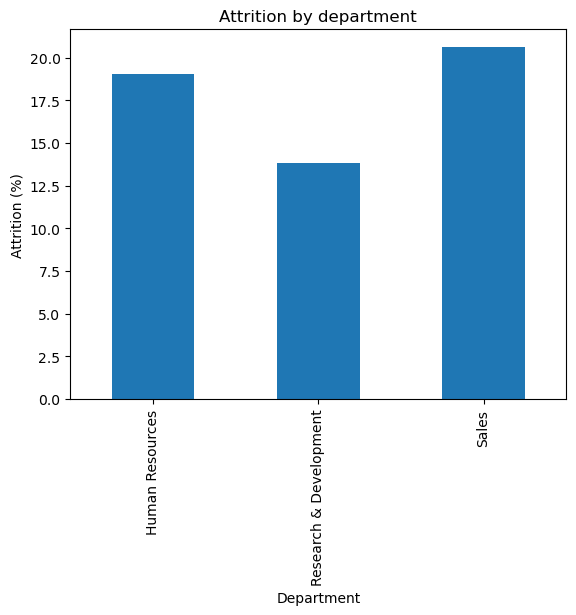

In [22]:
#department wise attrition
dept_attrition=df_copy.groupby('Department')['Attrition_flag'].mean() *100
dept_attrition.plot(kind='bar', title='Attrition by department')
plt.ylabel('Attrition (%)')
plt.show()

### Department-wise Attrition

Attrition varies across departments, with higher attrition observed in Sales and Human Resources compared to Research & Development. This indicates that department-specific roles and work pressures influence employee turnover.


In [23]:
df_copy['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

JobLevel
1    26.335175
2     9.737828
3    14.678899
4     4.716981
5     7.246377
Name: Attrition_flag, dtype: float64


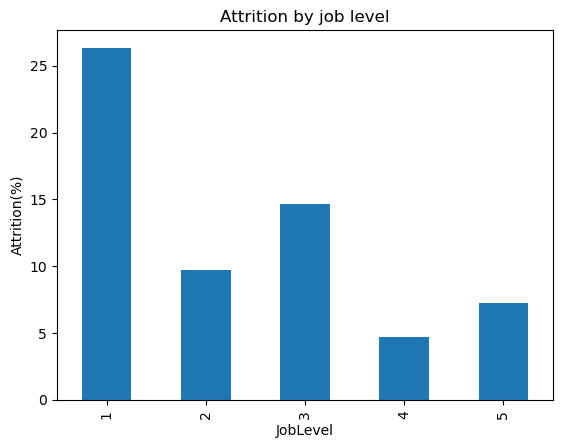

In [24]:
# Attrition by JobLevel
joblevel_attrition = (
    df_copy.groupby('JobLevel')['Attrition_flag']
    .mean() * 100
)

print(joblevel_attrition)
joblevel_attrition.plot(kind='bar',title='Attrition by job level')
plt.ylabel('Attrition(%)')
plt.show()

### Job Level–wise Attrition

Attrition is highest at the lowest job level and generally lower at higher job levels, though some variation exists across mid-level roles. Overall, senior job levels show better retention compared to entry-level positions.



In [25]:
np.unique(df_copy['JobRole'])

array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)

JobRole
Healthcare Representative     6.870229
Human Resources              23.076923
Laboratory Technician        23.938224
Manager                       4.901961
Manufacturing Director        6.896552
Research Director             2.500000
Research Scientist           16.095890
Sales Executive              17.484663
Sales Representative         39.759036
Name: Attrition_flag, dtype: float64


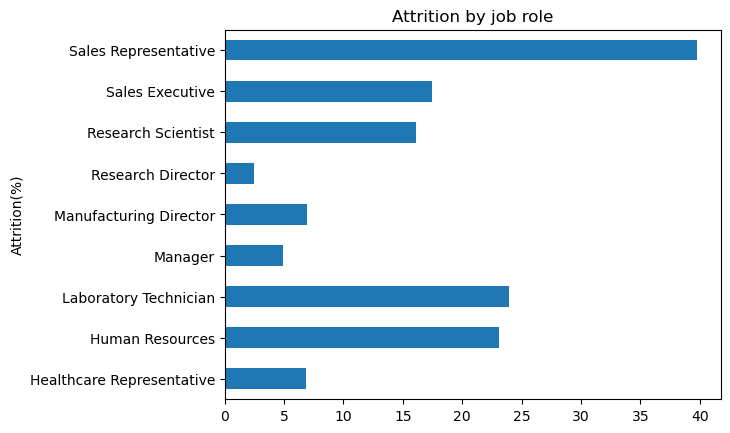

In [26]:
# Attrition by JobRole
JobRole_attrition=(
    df_copy.groupby('JobRole')['Attrition_flag'].mean()*100
    
)
print(JobRole_attrition)
JobRole_attrition.plot(kind='barh',title='Attrition by job role')
plt.ylabel('Attrition(%)')
plt.show()

### Job Role–wise Attrition

Attrition differs across job roles, with Sales Representative roles showing the highest attrition. In contrast, managerial and research leadership roles have much lower attrition, indicating higher role stability.


In [27]:
np.unique(df_copy['BusinessTravel'])

array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)

BusinessTravel
Non-Travel            8.000000
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Name: Attrition_flag, dtype: float64


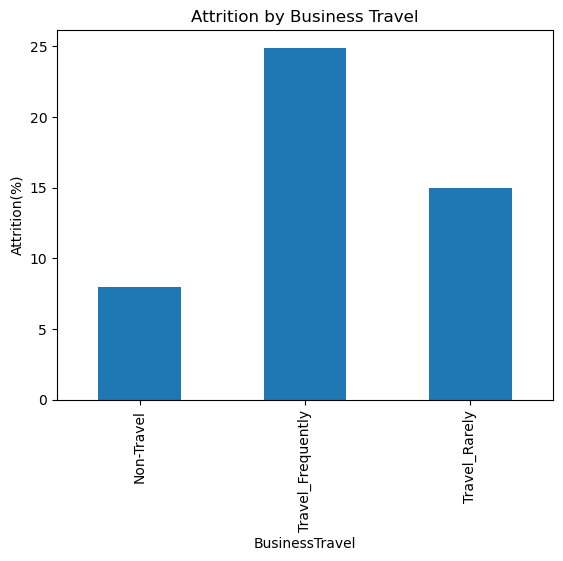

In [28]:
# BusinessTravel-wise Attrition
BusinessTravel_attrition=(
    df_copy.groupby('BusinessTravel')['Attrition_flag'].mean()*100
)
print(BusinessTravel_attrition)
BusinessTravel_attrition.plot(kind='bar',title='Attrition by Business Travel')
plt.ylabel('Attrition(%)')
plt.show()

### Business Travel–wise Attrition

Employees who travel frequently show higher attrition compared to those who travel rarely or not at all, suggesting that frequent travel is associated with increased employee turnover.


### Experience & Tenure Analysis
- How long they’ve been working

Experience_Bucket
Fresher               43.902439
Early Career          19.170984
Mid Career            14.991763
Experienced           11.470588
Highly Experienced     7.729469
Name: Attrition_flag, dtype: float64


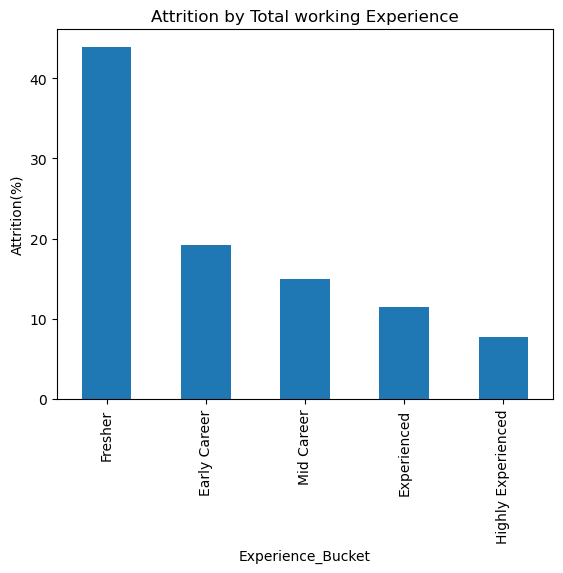

In [29]:
## attrition by TotalWorkingYears
df_copy['Experience_Bucket'] = pd.cut(
    df_copy['TotalWorkingYears'],
    bins=[0,2, 5, 10, 20,df_copy['TotalWorkingYears'].max() +1], 
    labels=['Fresher', 'Early Career', 'Mid Career', 'Experienced', 'Highly Experienced'],include_lowest=True
)
##distance from home  by attrition Rate
exp_attrition=df_copy.groupby('Experience_Bucket')['Attrition_flag'].mean()*100
print(exp_attrition)
exp_attrition.plot(kind='bar',title='Attrition by Total working Experience')
plt.ylabel('Attrition(%)')
plt.show()

 ### Experience-wise Attrition

Attrition is highest among freshers and early-career employees and decreases steadily with increasing work experience. This indicates that employees become more stable and less likely to leave as they gain experience.


YearsAtCompany_Bucket
New                 29.824561
Early Tenure        13.824885
Mid Tenure          12.276786
Long Tenure          6.666667
Very Long Tenure    12.121212
Name: Attrition_flag, dtype: float64


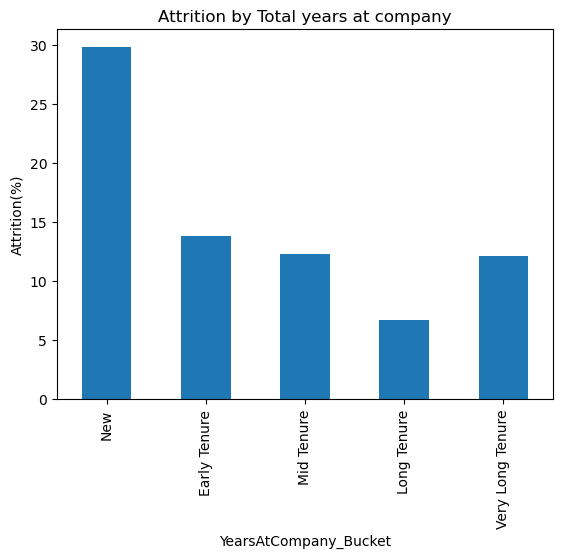

In [30]:
## Attrition rate by YearsAtCompany
df_copy['YearsAtCompany_Bucket']=pd.cut(
    df_copy['YearsAtCompany'],
    bins=[0,2,5,10,20,df_copy['YearsAtCompany'].max()+1],
    labels=['New', 'Early Tenure', 'Mid Tenure', 'Long Tenure', 'Very Long Tenure'],include_lowest=True
)
YearsAtCompany_attrition=df_copy.groupby('YearsAtCompany_Bucket')['Attrition_flag'].mean()*100
print(YearsAtCompany_attrition)
YearsAtCompany_attrition.plot(kind='bar',title='Attrition by Total years at company')
plt.ylabel('Attrition(%)')
plt.show()

### Tenure-wise Attrition

Attrition is highest in the initial years at the company and generally decreases as tenure increases. Employees with longer tenure show stronger retention, with minor variation among very long-tenured employees.


## Engagement & Satisfaction
How employees feel

JobSatisfaction_bucket
high         16.515837
low          22.837370
medium       16.428571
very high    11.328976
Name: Attrition_flag, dtype: float64


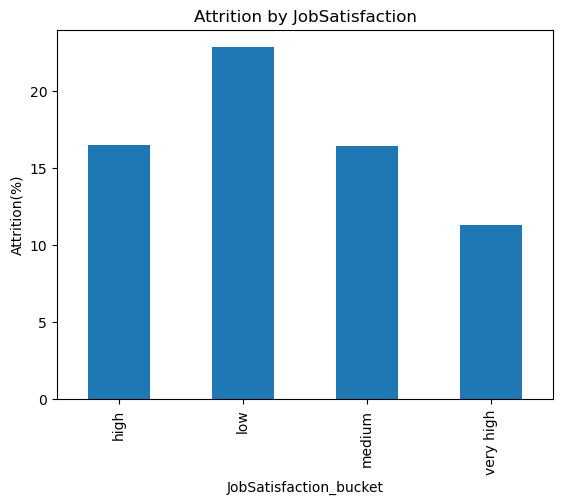

In [31]:
## attrition by job satisfaction 
JobSatisfaction_map={
    1:'low',2:'medium',3:'high',4:'very high'
}
df_copy['JobSatisfaction_bucket']=df_copy['JobSatisfaction'].map(JobSatisfaction_map)
JobSatisfaction_attrition=df_copy.groupby('JobSatisfaction_bucket')['Attrition_flag'].mean()*100
print(JobSatisfaction_attrition)
JobSatisfaction_attrition.plot(kind='bar',title='Attrition by JobSatisfaction')
plt.ylabel('Attrition(%)')
plt.show()

### Job Satisfaction–wise Attrition

Employees with low job satisfaction show higher attrition, while attrition decreases as job satisfaction improves. This highlights job satisfaction as a key factor influencing employee retention.


In [32]:
pd.crosstab(df_copy['JobSatisfaction'], df_copy['Attrition'], normalize='index') * 100

Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


In [33]:
np.unique(df_copy['EnvironmentSatisfaction'])

array([1, 2, 3, 4], dtype=int64)

EnvironmentSatisfaction_bucket
high         13.686534
low          25.352113
medium       14.982578
very high    13.452915
Name: Attrition_flag, dtype: float64


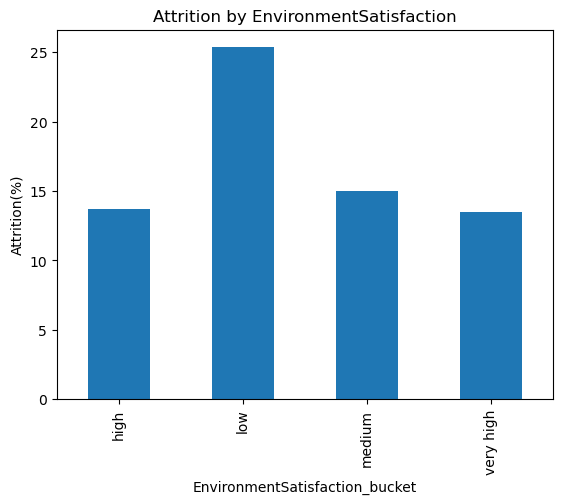

In [34]:
#EnvironmentSatisfaction-wise Attrition
EnvironmentSatisfaction_map={
    1:'low',
    2:'medium',
    3: 'high',
    4:'very high'
}
df_copy['EnvironmentSatisfaction_bucket']=df_copy['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_map)
EnvironmentSatisfaction_attrition=(
    df_copy.groupby('EnvironmentSatisfaction_bucket')['Attrition_flag'].mean()*100
)
print(EnvironmentSatisfaction_attrition)
EnvironmentSatisfaction_attrition.plot(kind='bar',title='Attrition by EnvironmentSatisfaction')
plt.ylabel('Attrition(%)')
plt.show()

### Environment Satisfaction–wise Attrition

Attrition is higher among employees with low environment satisfaction and decreases as satisfaction levels improve. This suggests that a positive work environment plays an important role in retaining employees.


In [35]:
np.unique(df_copy['JobInvolvement'])

array([1, 2, 3, 4], dtype=int64)

JobInvolvement_bucket
high         14.400922
low          33.734940
medium       18.933333
very high     9.027778
Name: Attrition_flag, dtype: float64


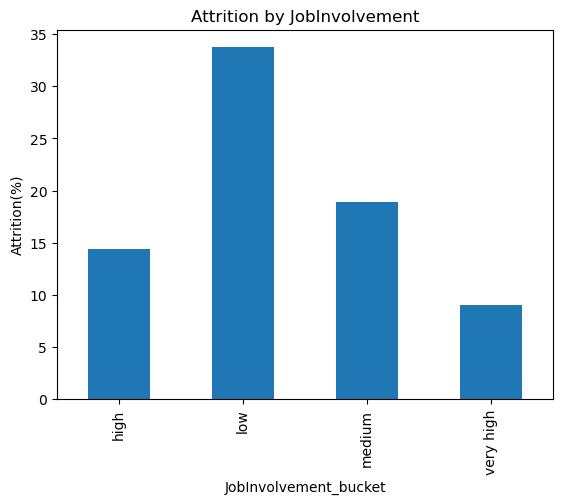

In [36]:
## attrition by job involvement 

JobInvolvement_map={
    1:'low',
    2:'medium',
    3:'high',
    4:'very high'
}
df_copy['JobInvolvement_bucket']=df_copy['JobInvolvement'].map(JobInvolvement_map)
JobInvolvement_attrition=df_copy.groupby('JobInvolvement_bucket')['Attrition_flag'].mean()*100
print(JobInvolvement_attrition)
JobInvolvement_attrition.plot(kind='bar',title='Attrition by JobInvolvement')
plt.ylabel('Attrition(%)')
plt.show()

### Job Involvement–wise Attrition

Attrition is highest among employees with low job involvement and decreases as involvement increases. Employees with high and very high involvement show significantly better retention.


In [37]:
np.unique(df_copy['RelationshipSatisfaction'])

array([1, 2, 3, 4], dtype=int64)

RelationshipSatisfaction_bucket
high         15.468410
low          20.652174
medium       14.851485
very high    14.814815
Name: Attrition_flag, dtype: float64


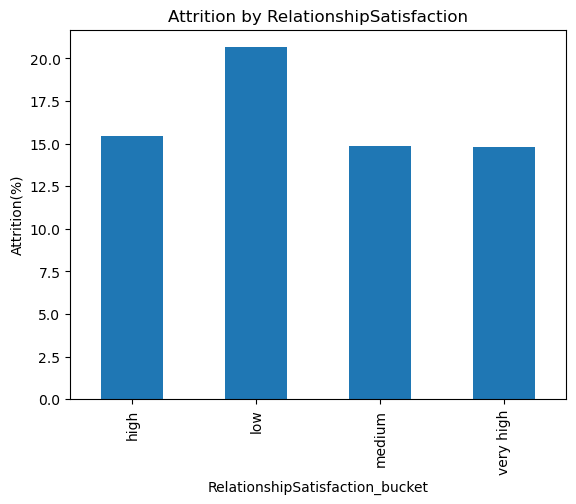

In [38]:
RelationshipSatisfaction_map={
    1:'low',
    2:'medium',
    3:'high',
    4:'very high'
}
df_copy['RelationshipSatisfaction_bucket']=df_copy['RelationshipSatisfaction'].map(RelationshipSatisfaction_map)
RelationshipSatisfaction_attrition=df_copy.groupby('RelationshipSatisfaction_bucket')['Attrition_flag'].mean()*100
print(RelationshipSatisfaction_attrition)
RelationshipSatisfaction_attrition.plot(kind='bar',title='Attrition by RelationshipSatisfaction')
plt.ylabel('Attrition(%)')
plt.show()

### Relationship Satisfaction–wise Attrition

Employees with low relationship satisfaction show higher attrition compared to those with better workplace relationships. Overall, improved relationship satisfaction is associated with stronger employee retention.


## Work Conditions & Lifestyle
Daily work pressure & balance

OverTime
No     10.436433
Yes    30.528846
Name: Attrition_flag, dtype: float64


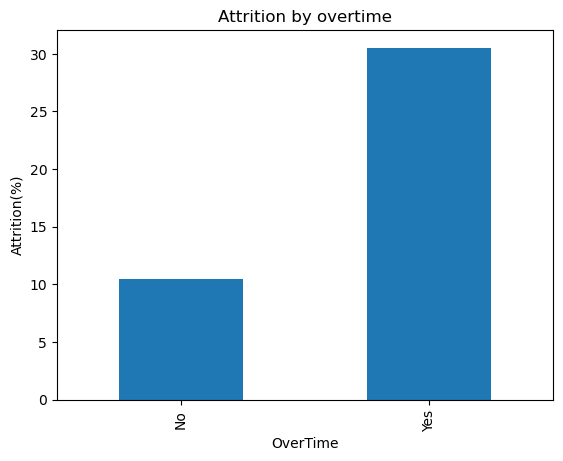

In [39]:
## Overtime-wise Attrition Rate
overtime_attrition=df_copy.groupby('OverTime')['Attrition_flag'].mean()*100
print(overtime_attrition)
overtime_attrition.plot(kind='bar',title='Attrition by overtime')
plt.ylabel('Attrition(%)')
plt.show()

### Overtime-wise Attrition

Employees who work overtime show significantly higher attrition compared to those who do not. This indicates that extended working hours and workload pressure are strongly associated with employee turnover.


WorkLifeBalance_bucket
Bad       31.250000
Best      17.647059
Better    14.221725
Good      16.860465
Name: Attrition_flag, dtype: float64


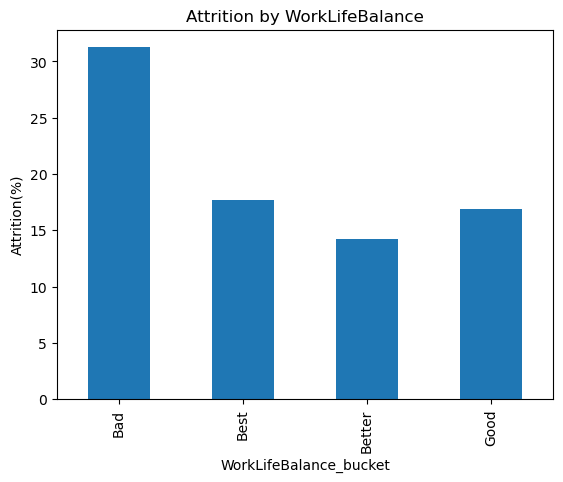

In [40]:
## Attriton by WorkLifeBalance
## worklife balance mapping
wlb_map={
    1:'Bad',
    2:'Good',
    3:'Better',
    4:'Best'
}
df_copy['WorkLifeBalance_bucket']=df_copy['WorkLifeBalance'].map(wlb_map)
wlb_attrition=df_copy.groupby('WorkLifeBalance_bucket')['Attrition_flag'].mean()*100
print(wlb_attrition)
wlb_attrition.plot(kind='bar',title='Attrition by WorkLifeBalance')
plt.ylabel('Attrition(%)')
plt.show()

### Work–Life Balance–wise Attrition

Employees with poor work–life balance show higher attrition, while attrition decreases as work–life balance improves. This highlights the importance of maintaining a healthy balance to improve employee retention.


Distance_Bucket
Very Close    13.765823
Close         14.467005
Moderate      21.739130
Far           18.400000
Very Far      22.058824
Name: Attrition_flag, dtype: float64


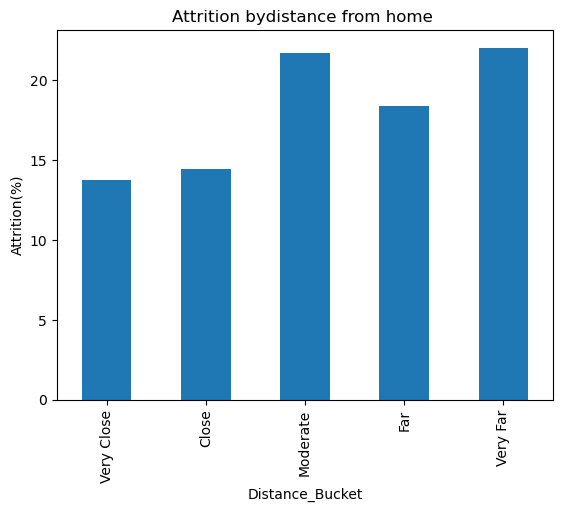

In [41]:
## attrition rate by distance from home

df_copy['Distance_Bucket'] = pd.cut(
    df_copy['DistanceFromHome'],
    bins=[0, 5, 10, 15, 20, 30], 
    labels=['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']
)
##distance from home  by attrition Rate
distance_attrition=df_copy.groupby('Distance_Bucket')['Attrition_flag'].mean()*100
print(distance_attrition)
distance_attrition.plot(kind='bar',title='Attrition bydistance from home ')
plt.ylabel('Attrition(%)')
plt.show()

### Distance from Home–wise Attrition

Attrition tends to increase as commuting distance increases, with higher attrition observed among employees living farther from the workplace. This suggests that longer commute distances may contribute to higher employee turnover.


## Behavioral and Career History

Past behavior patterns

NumCompaniesWorked_bucket
0-1    16.852368
2-3    10.491803
4-5    16.336634
6+     20.816327
Name: Attrition_flag, dtype: float64


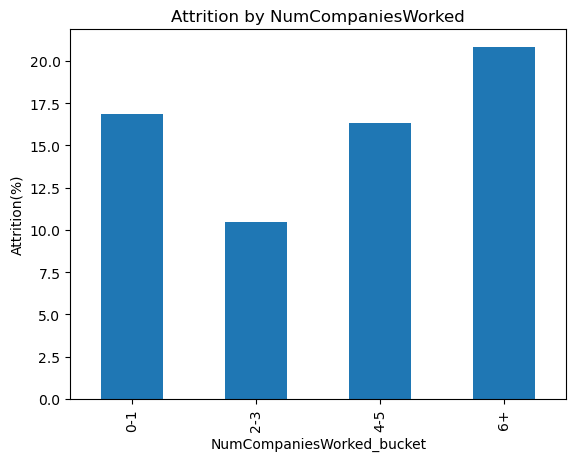

In [42]:
df_copy['NumCompaniesWorked_bucket']=pd.cut(
    df_copy['NumCompaniesWorked'],
    bins=[0,1,3,5,df_copy['NumCompaniesWorked'].max()+1],
    labels=['0-1','2-3','4-5','6+'],include_lowest=True
    
)


num_comp_attrition = (
    df_copy.groupby('NumCompaniesWorked_bucket')['Attrition_flag']
    .mean() * 100
)

print(num_comp_attrition)
num_comp_attrition.plot(kind='bar',title='Attrition by NumCompaniesWorked')
plt.ylabel('Attrition(%)')
plt.show()

### Number of Companies Worked–wise Attrition

Attrition is higher among employees who have worked at many companies, especially those with a history of frequent job changes. Employees with fewer previous employers show relatively better retention, indicating that past job-hopping behavior is associated with higher attrition risk.


In [43]:
df_copy = df_copy.drop('Attrition', axis=1)


## Machine Learning: Attrition Prediction
In this section, a machine learning model is built to predict employee attrition.
The objective is to validate the insights obtained from exploratory data analysis
and identify the most important factors influencing employee attrition.
Attrition prediction is treated as a binary classification problem.

In [44]:
## target variable
y=df_copy['Attrition_flag']
## select features
X = df_copy[
    [
        'Age',
        'MonthlyIncome',
        'DistanceFromHome',
        'TotalWorkingYears',
        'YearsAtCompany',
        'NumCompaniesWorked',
        'JobLevel',
        'JobSatisfaction',
        'EnvironmentSatisfaction',
        'RelationshipSatisfaction',
        'JobInvolvement',
        'WorkLifeBalance',
        'StockOptionLevel',
        'Department',
        'JobRole',
        'BusinessTravel',
        'MaritalStatus',
        'Gender',
        'OverTime',
        'EducationField'
    ]
]
## train test split
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
## encoding categorical Variables
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
## align column
X_train,X_test=X_train.align(X_test,join='left',axis=1,fill_value=0)

The target variable for this model is employee attrition, represented as a binary flag.
Features were selected based on insights from exploratory analysis and include
demographics, compensation, experience, job role, work conditions, and engagement factors.
The dataset was split into training and test sets using a stratified approach to
maintain the original attrition distribution across both datasets.
Categorical variables were converted into numerical format using one-hot encoding.
Column alignment was applied to ensure consistency between training and test data.


In [45]:
## model and evaluation-Logistic regressuin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
log_model=LogisticRegression(max_iter=1000,class_weight='balanced')
log_model.fit(X_train,y_train)
y_pred_log=log_model.predict(X_test)
y_prob_log=log_model.predict_proba(X_test)[:,1]
print("accuracy:",accuracy_score(y_test,y_pred_log))
print("ROC-AUC",roc_auc_score(y_test,y_prob_log))
print(classification_report(y_test,y_pred_log))

accuracy: 0.7744565217391305
ROC-AUC 0.8048379134441336
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       309
           1       0.38      0.64      0.48        59

    accuracy                           0.77       368
   macro avg       0.65      0.72      0.67       368
weighted avg       0.83      0.77      0.80       368



The Logistic Regression model demonstrates solid performance with an accuracy of around 77% 
and a strong ROC-AUC score of approximately 0.80, indicating good discrimination between employees 
who stay and those who leave.

The model also shows higher recall for attrition cases, making it effective at identifying employees 
who are at risk of leaving, which is particularly important from a retention and HR decision-making perspective.


In [46]:
##Tree-Based Model – Random Forest
# import Random Forest 
from sklearn.ensemble import RandomForestClassifier 
##Model Initialize
rf_model=RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')
## Train Model
rf_model.fit(X_train,y_train)
## predictions
y_pred_rf=rf_model.predict(X_test)
y_prob_rf=rf_model.predict_proba(X_test)[:,1]
## evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.845108695652174
ROC-AUC: 0.7697602983928473
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       309
           1       0.62      0.08      0.15        59

    accuracy                           0.85       368
   macro avg       0.74      0.54      0.53       368
weighted avg       0.81      0.85      0.79       368



The Random Forest model achieves higher overall accuracy compared to the baseline model.
However, it shows weaker performance in identifying attrition cases, as reflected by a
lower recall for employees who leave the organization.

While the model performs very well for predicting employees who stay, its limited ability
to detect attrition cases reduces its usefulness for retention-focused decision making.


In [47]:
## features Importance 
feature_importance =pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance.head(10)

MonthlyIncome              0.103719
Age                        0.090041
TotalWorkingYears          0.075509
YearsAtCompany             0.071412
DistanceFromHome           0.063610
OverTime_Yes               0.055941
NumCompaniesWorked         0.055146
StockOptionLevel           0.045195
EnvironmentSatisfaction    0.041237
JobSatisfaction            0.038686
dtype: float64

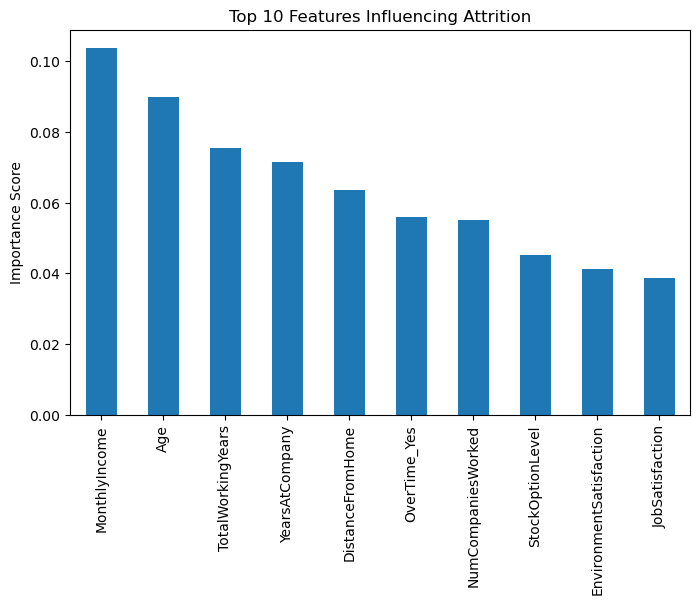

In [48]:
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Features Influencing Attrition")
plt.ylabel("Importance Score")
plt.show()


The feature importance results indicate that compensation and experience-related factors
play a major role in employee attrition. Monthly income, age, total working years, and
years at the company emerge as the most influential predictors.

Work conditions and engagement factors such as overtime, distance from home, job satisfaction,
and environment satisfaction also contribute significantly to attrition risk.



## Conclusion

This project analyzed employee attrition using a combination of exploratory data
analysis and machine learning techniques. The analysis identified key drivers of
attrition, including compensation level, career stage, workload pressure, commuting
distance, past job-hopping behavior, and employee engagement factors.

Among the models evaluated, Logistic Regression provided the best balance between
predictive performance and business relevance. The model effectively identifies
employees at risk of leaving, making it suitable for supporting HR retention strategies
and proactive decision-making.


In [49]:
df_copy.to_csv("hr_attrition_cleaned.csv", index=False)


In [51]:
df_copy.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_flag', 'Age_bucket',
       'Education_Bucket', 'Salary_Bucket', 'Experience_Bucket',
       'YearsAtCompany_Bucket', 'JobSatisfaction_bucket',
       'EnvironmentSatisfaction_bucket', 'JobInvolvement_bucket',
       'RelationshipSatisfaction_bucket', 'WorkLifeBalance_bucket',
       'Distance_Bucket', 'NumCompaniesWorked_bucket'],
      dtype='object')